In [1]:
import pandas as  pd

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [83]:
df=pd.read_csv('monroe-county-crash-data2003-to-2015.csv',encoding= 'unicode_escape')

In [84]:
df.shape

(53943, 12)

In [85]:
df.head()

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [86]:
df["Year"]=df["Year"].astype('str')
df["Month"]=df["Month"].astype('str')
df["Day"]=df["Day"].astype('str')

In [87]:
df["Date"]=df["Year"]+"-"+df["Month"]+"-"+df["Day"]

In [91]:
df["Date"]=pd.to_datetime(df["Date"]) 

In [95]:
df = df.sort_values(by="Date")

2-Car               37606
1-Car               10245
3+ Cars              3152
Moped/Motorcycle     1007
Bus                   850
Pedestrian            609
Cyclist               468
Name: Collision Type, dtype: int64


Text(0, 0.5, 'Total Accidents')

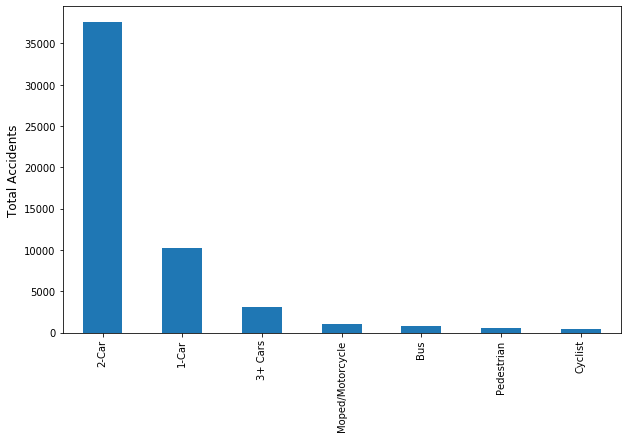

In [97]:
plt.figure(figsize=(10,6))
print(df["Collision Type"].value_counts().sort_values(ascending=False).head(10))
df["Collision Type"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
plt.ylabel('Total Accidents', fontsize=12)

Year
2003    4625
2004    4269
2005    3967
2006    3937
2007    4055
2008    4341
2009    4014
2010    4060
2011    3914
2012    4223
2013    4058
2014    4167
2015    4313
Name: Master Record Number, dtype: int64


Text(0, 0.5, 'Total Accidents')

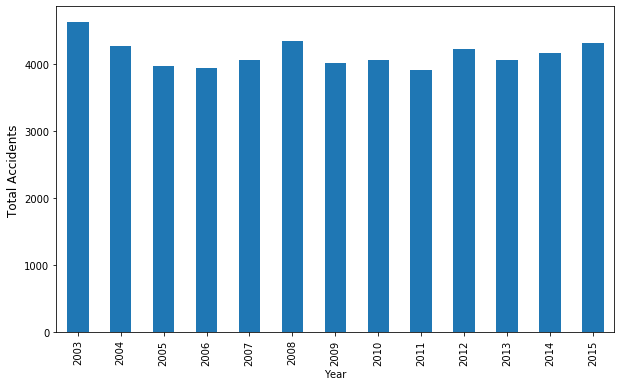

In [105]:
plt.figure(figsize=(10,6))
print(df.groupby('Year')['Master Record Number'].count())
df.groupby('Year')['Master Record Number'].count().plot(kind="bar")
plt.ylabel('Total Accidents', fontsize=12)

Text(0, 0.5, 'Total Accidents')

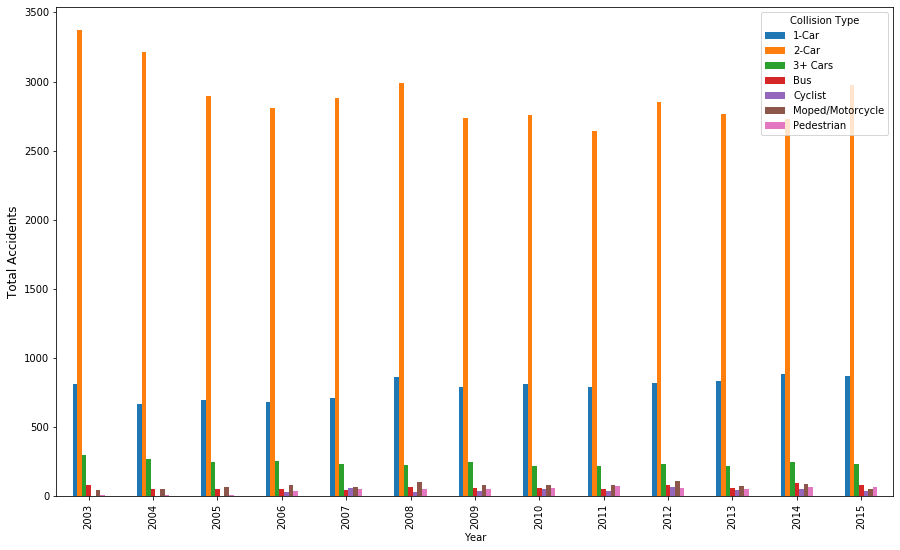

In [146]:
pd.crosstab(df["Year"],df["Collision Type"]).plot(kind="bar",figsize=(15,9))
plt.ylabel('Total Accidents', fontsize=12)

In [107]:
df["Day"]=df["Day"].replace('1',"Monday")
df["Day"]=df["Day"].replace('2',"Tuesday")
df["Day"]=df["Day"].replace('3',"Wednesday")
df["Day"]=df["Day"].replace('4',"Thusday")
df["Day"]=df["Day"].replace('5',"Friday")
df["Day"]=df["Day"].replace('6',"Saturday")
df["Day"]=df["Day"].replace('7',"Sunday")


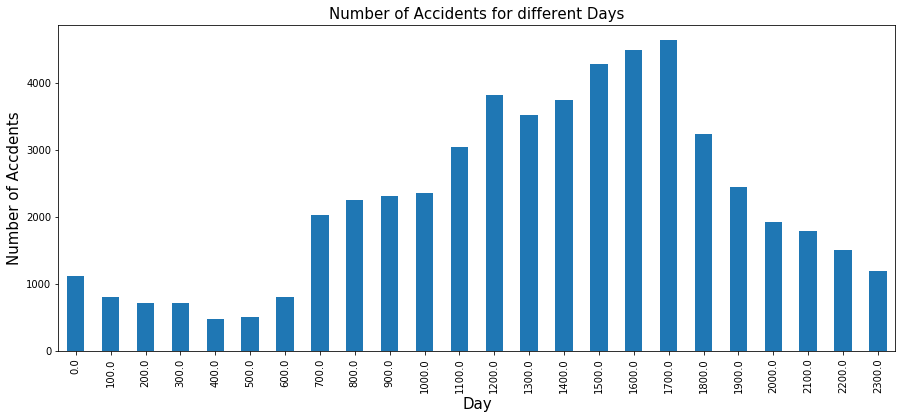

In [108]:
ax = df.groupby('Hour')['Master Record Number'].count().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Accdents',fontsize=15)
ax.set_title('Number of Accidents for different Days',fontsize=15)
plt.show()

Text(0, 0.5, 'Total Accidents')

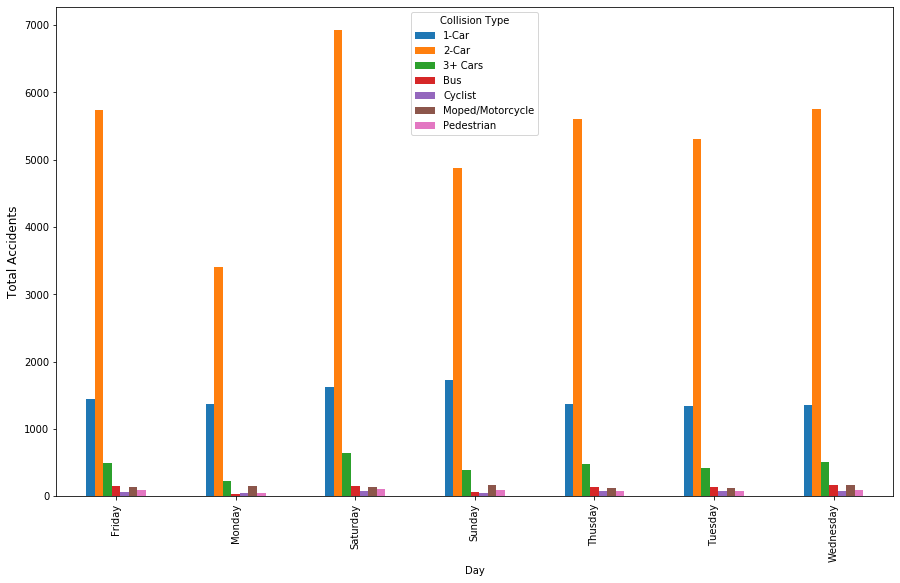

In [109]:
pd.crosstab(df["Day"],df["Collision Type"]).plot(kind="bar",figsize=(15,9))
plt.ylabel('Total Accidents', fontsize=12)

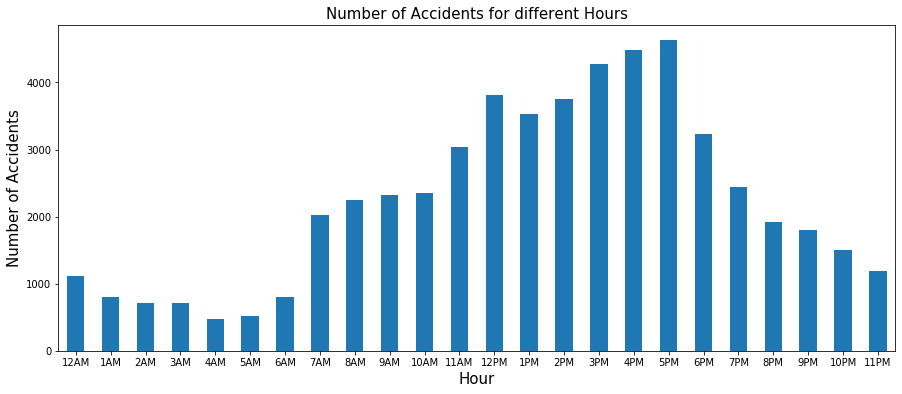

In [110]:

ax = df.groupby('Hour')['Master Record Number'].count().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Accidents',fontsize=15)
ax.set_title('Number of Accidents for different Hours',fontsize=15)
ax.set_xticklabels(('12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM',
                    '9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM',
                    '10PM','11PM'), rotation='horizontal', fontsize=10)
plt.show()


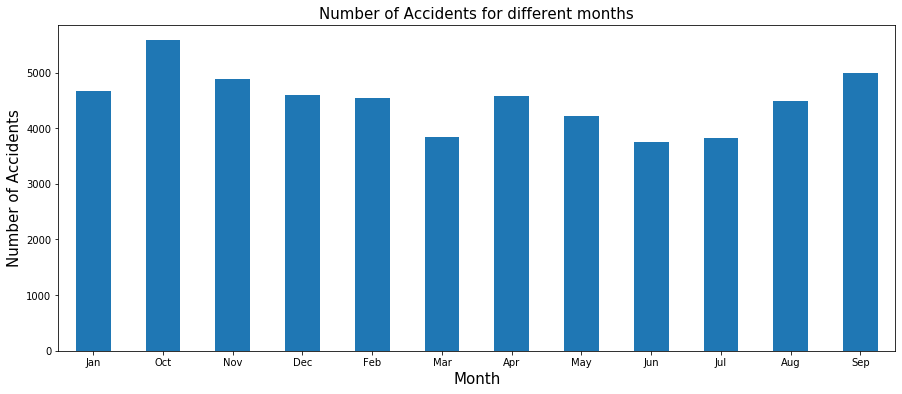

In [190]:
ax = df.groupby('Month')['Master Record Number'].count().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Accidents',fontsize=15)
ax.set_title('Number of Accidents for different months',fontsize=15)
ax.set_xticklabels(("Jan","Oct","Nov","Dec","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep"), rotation='horizontal', fontsize=10)
plt.show()

In [111]:
df.head(1)

,Master Record Number,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Date
52447,686168,2003,1,Monday,Weekday,2200.0,1-Car,No injury/unknown,ALCOHOLIC BEVERAGES,MADISON,39.15304,-86.537552,2003-01-01


Reported_Location
E 3RD ST             375
W 3RD ST             222
SR37N & VERNAL       197
3RD ST               195
S WALNUT ST          172
E 10TH ST            153
N WALNUT ST          124
S COLLEGE MALL RD    123
SR37 & VERNAL        123
WALNUT ST            117
Name: Master Record Number, dtype: int64


Text(0, 0.5, 'Total Accidents')

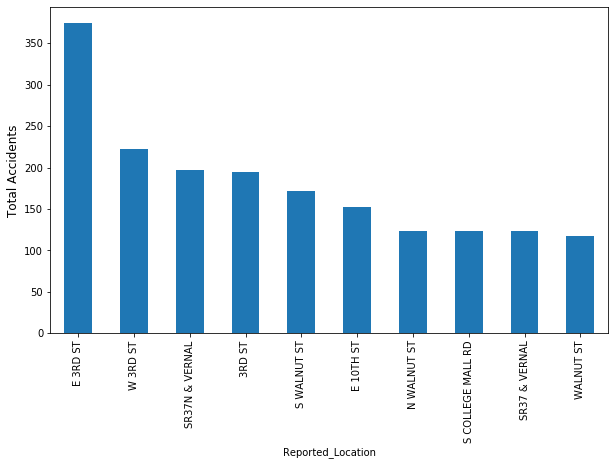

In [112]:
plt.figure(figsize=(10,6))
print(df.groupby("Reported_Location")["Master Record Number"].count().sort_values(ascending=False).head(10))
df.groupby("Reported_Location")["Master Record Number"].count().sort_values(ascending=False).head(10).plot(kind="bar")
plt.ylabel('Total Accidents', fontsize=12)

In [113]:
df["Injury Type"].value_counts()

No injury/unknown     41603
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: Injury Type, dtype: int64

In [126]:
df1=  df.groupby(["Day",'Collision Type']).size().unstack()
print(df1)

Collision Type  1-Car  2-Car  3+ Cars  Bus  Cyclist  Moped/Motorcycle  \
Day                                                                     
Friday           1451   5733      488  152       66               137   
Monday           1376   3401      226   31       43               160   
Saturday         1628   6923      645  160       73               140   
Sunday           1724   4880      397   59       49               163   
Thusday          1367   5602      475  145       77               126   
Tuesday          1336   5314      416  137       75               119   
Wednesday        1363   5753      505  166       85               162   

Collision Type  Pedestrian  
Day                         
Friday                  94  
Monday                  53  
Saturday               111  
Sunday                  92  
Thusday                 86  
Tuesday                 74  
Wednesday               99  


In [128]:
df.groupby(["Day",'Collision Type']).size().unstack()

Collision Type,1-Car,2-Car,3+ Cars,Bus,Cyclist,Moped/Motorcycle,Pedestrian
Day,,,,,,,
Friday,1451,5733,488,152,66,137,94
Monday,1376,3401,226,31,43,160,53
Saturday,1628,6923,645,160,73,140,111
Sunday,1724,4880,397,59,49,163,92
Thusday,1367,5602,475,145,77,126,86
Tuesday,1336,5314,416,137,75,119,74
Wednesday,1363,5753,505,166,85,162,99


In [134]:
#pd.crosstab(df["Day"],df["Collision Type"]).plot(kind="bar",stacked=True)

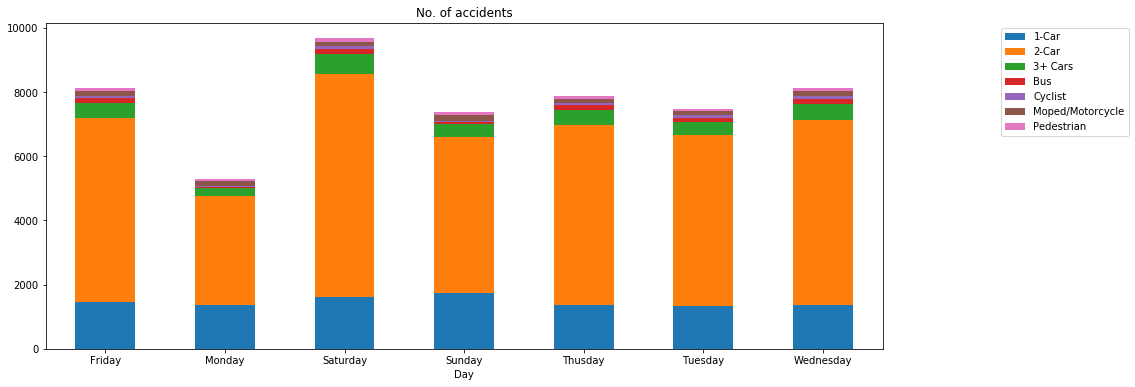

In [127]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('No. of accidents')
df1.plot(kind='bar', figsize=(15,6),stacked=True, ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

[Text(0, 0, '12AM'),
 Text(0, 0, '1AM'),
 Text(0, 0, '2AM'),
 Text(0, 0, '3AM'),
 Text(0, 0, '4AM'),
 Text(0, 0, '5AM'),
 Text(0, 0, '6AM'),
 Text(0, 0, '7AM'),
 Text(0, 0, '8AM'),
 Text(0, 0, '9AM'),
 Text(0, 0, '10AM'),
 Text(0, 0, '11AM'),
 Text(0, 0, '12PM'),
 Text(0, 0, '1PM'),
 Text(0, 0, '2PM'),
 Text(0, 0, '3PM'),
 Text(0, 0, '4PM'),
 Text(0, 0, '5PM'),
 Text(0, 0, '6PM'),
 Text(0, 0, '7PM'),
 Text(0, 0, '8PM'),
 Text(0, 0, '9PM'),
 Text(0, 0, '10PM'),
 Text(0, 0, '11PM')]

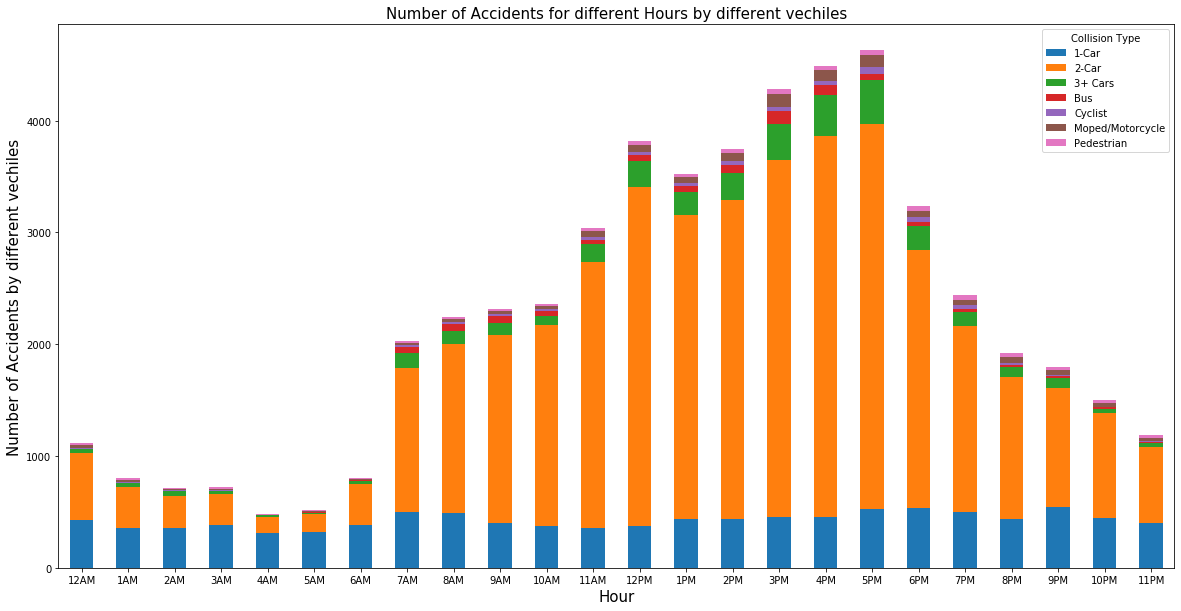

In [141]:
ax=pd.crosstab(df["Hour"],df["Collision Type"]).plot(kind="bar",stacked=True,figsize=(20,10))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Accidents by different vechiles',fontsize=15)
ax.set_title('Number of Accidents for different Hours by different vechiles',fontsize=15)
ax.set_xticklabels(('12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM',
                    '9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM',
                    '10PM','11PM'), rotation='horizontal', fontsize=10)

Text(0.5, 1.0, 'Number of Accidents for different years by different vechiles')

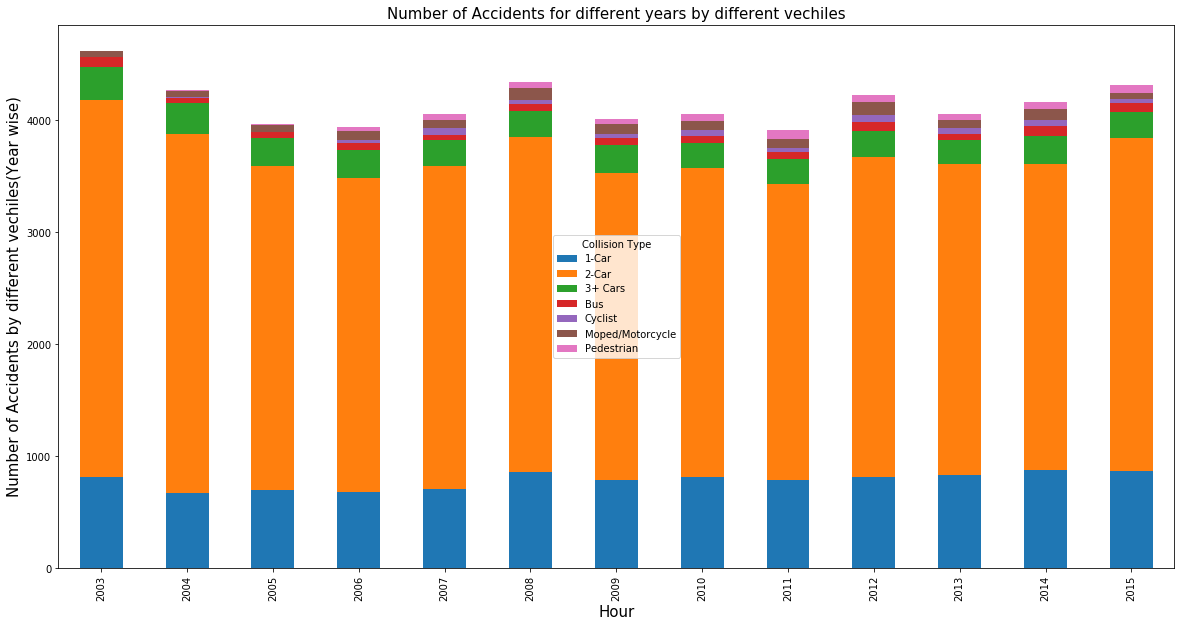

In [143]:
ax=pd.crosstab(df["Year"],df["Collision Type"]).plot(kind="bar",stacked=True,figsize=(20,10))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Accidents by different vechiles(Year wise)',fontsize=15)
ax.set_title('Number of Accidents for different years by different vechiles',fontsize=15)

In [153]:
a=[]
for i in range(1,df.shape[0]+1):
    a.append(i)
    

In [155]:
df.shape[0] , len(a)

(53943, 53943)

In [156]:
df["Temp"]=a

In [160]:
df["Primary Factor"].value_counts()

FAILURE TO YIELD RIGHT OF WAY               11193
FOLLOWING TOO CLOSELY                        7359
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6158
UNSAFE BACKING                               5188
RAN OFF ROAD RIGHT                           2925
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1921
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1688
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
UNSAFE SPEED                                 1499
ROADWAY SURFACE CONDITION                    1270
LEFT OF CENTER                               1078
IMPROPER LANE USAGE                           985
ALCOHOLIC BEVERAGES                           805
UNSAFE LANE MOVEMENT                          756
OVERCORRECTING/OVERSTEERING                   597
IMPROPER PASSING                              496
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        472
OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR       418


In [ ]:
FAILURE
SPEED FAST
IMPROPER
ALCOHOLIC
UNSAFE
PHONE
ANIMAL
DRIVER


In [170]:
def cause(dff):
    if "FAILURE" in dff["Primary Factor"]:
        return("Failure Problem")
    if "SPEED" in dff["Primary Factor"] or "FAST" in dff["Primary Factor"] or "UNSAFE" in dff["Primary Factor"]:
        return("Over Speed")
    if "ASLEEP" in dff["Primary Factor"] or "ILLNESS" in dff["Primary Factor"]:
        return("Driver is sick")
    if "IMPROPER" in dff["Primary Factor"] or "PHONE" in dff["Primary Factor"]:
        return("IMPROPER LANE USAGE")
    if "ALCOHOLIC" in dff["Primary Factor"]:
        return("Drunk and Drive")
    if "NARR" in dff["Primary Factor"]:
        return("NARRATIVE")
    else:
        return("Others")
    

In [177]:
df["Primary Factor"]=df["Primary Factor"].astype('str')

In [178]:

df["Simplified_cause"]=df.apply(cause,axis=1)

Text(0.5, 1.0, 'Number of Accidents for different years by different causes')

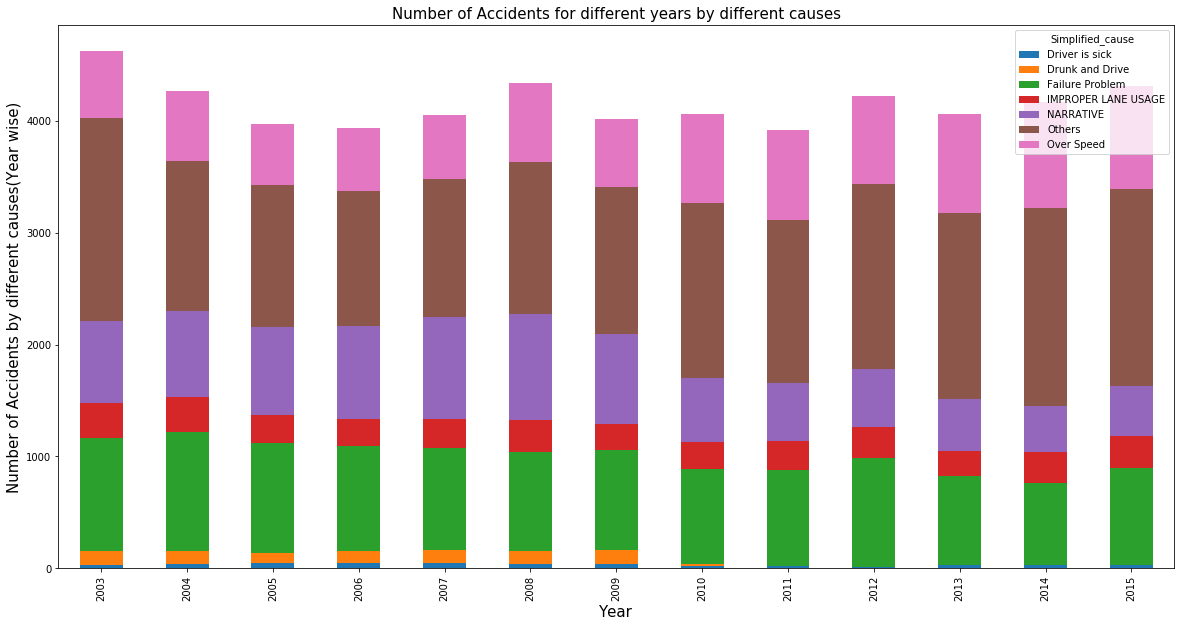

In [183]:
ax=pd.crosstab(df["Year"],df["Simplified_cause"]).plot(kind="bar",stacked=True,figsize=(20,10))
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Number of Accidents by different causes(Year wise)',fontsize=15)
ax.set_title('Number of Accidents for different years by different causes',fontsize=15)

[Text(0, 0, '12AM'),
 Text(0, 0, '1AM'),
 Text(0, 0, '2AM'),
 Text(0, 0, '3AM'),
 Text(0, 0, '4AM'),
 Text(0, 0, '5AM'),
 Text(0, 0, '6AM'),
 Text(0, 0, '7AM'),
 Text(0, 0, '8AM'),
 Text(0, 0, '9AM'),
 Text(0, 0, '10AM'),
 Text(0, 0, '11AM'),
 Text(0, 0, '12PM'),
 Text(0, 0, '1PM'),
 Text(0, 0, '2PM'),
 Text(0, 0, '3PM'),
 Text(0, 0, '4PM'),
 Text(0, 0, '5PM'),
 Text(0, 0, '6PM'),
 Text(0, 0, '7PM'),
 Text(0, 0, '8PM'),
 Text(0, 0, '9PM'),
 Text(0, 0, '10PM'),
 Text(0, 0, '11PM')]

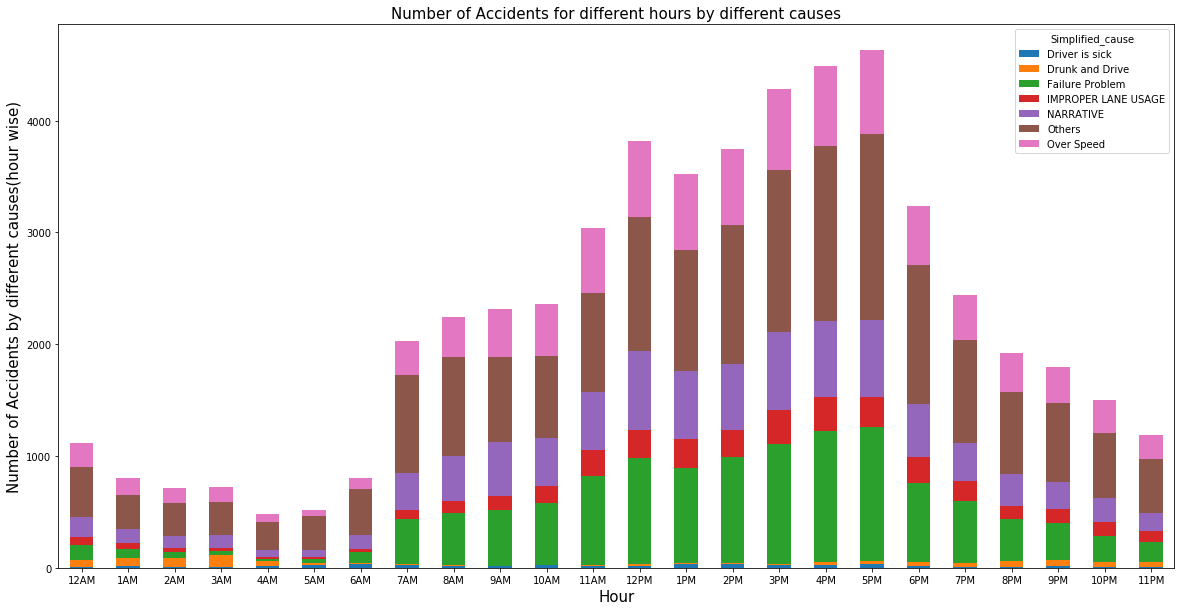

In [186]:
ax=pd.crosstab(df["Hour"],df["Simplified_cause"]).plot(kind="bar",stacked=True,figsize=(20,10))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Accidents by different causes(hour wise)',fontsize=15)
ax.set_title('Number of Accidents for different hours by different causes',fontsize=15)
ax.set_xticklabels(('12AM','1AM','2AM','3AM','4AM','5AM','6AM','7AM','8AM',
                    '9AM','10AM','11AM','12PM','1PM','2PM','3PM','4PM','5PM','6PM','7PM','8PM','9PM',
                    '10PM','11PM'), rotation='horizontal', fontsize=10)

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep')]

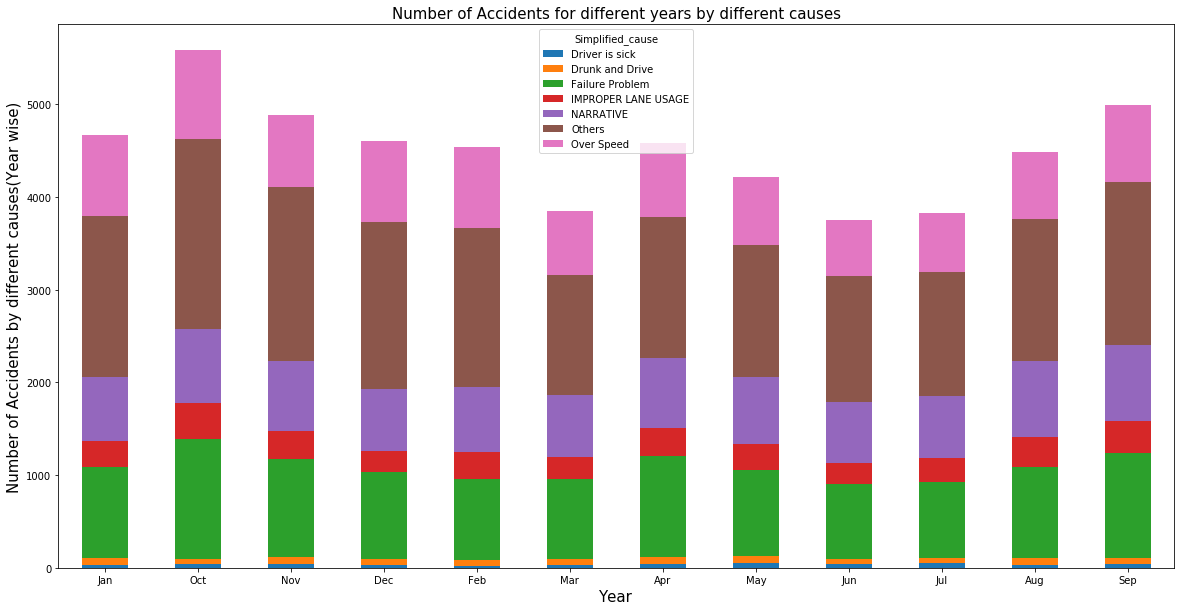

In [191]:
ax=pd.crosstab(df["Month"],df["Simplified_cause"]).plot(kind="bar",stacked=True,figsize=(20,10))
ax.set_xlabel('Year',fontsize=15)
ax.set_ylabel('Number of Accidents by different causes(Year wise)',fontsize=15)
ax.set_title('Number of Accidents for different years by different causes',fontsize=15)
ax.set_xticklabels(("Jan","Oct","Nov","Dec","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep"), rotation='horizontal', fontsize=10)